## Trading Strategies

### Simple moving averages (SMA) based strategies

A signal is derived, for example, when an SMA defined on a shorter time window—say 42 days—crosses an SMA defined on a longer time window—say 252 days.

### Momentum strategies

These are strategies that arex based on the hypothesis that recent performance will persist for some additional time.

### Mean-reversion strategies

The reasoning behind mean-reversion strategies is that stock prices or prices of other financial instruments tend to revert to some mean level or to some trend level when they have deviated too much from such levels.

## Making Use of Vectorization




In [1]:
v = [1, 2, 3, 4, 5]

In [2]:
sm = [2 * i for i in v]
sm

[2, 4, 6, 8, 10]

In [3]:
# doesn't work as expected with the stdlib
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

### Vectorization with NumPy

In [4]:
import numpy as np

In [5]:
a = np.array(v)
a

array([1, 2, 3, 4, 5])

In [6]:
type(a)

numpy.ndarray

In [7]:
# works as expected with NumPy
2 * a

array([ 2,  4,  6,  8, 10])

In [8]:
# multi-dimensional arrays:

a = np.arange(12).reshape((4, 3))
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [9]:
2 * a

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [10]:
a.mean()

5.5

In [11]:
a.mean(axis=0)

array([4.5, 5.5, 6.5])

### Vectorization with pandas

In [12]:
a = np.arange(15).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [13]:
import pandas as pd

In [14]:
columns = list('abc')
columns

['a', 'b', 'c']

In [15]:
index = pd.date_range('2021-7-1', periods=5, freq='B')
index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')

In [16]:
df = pd.DataFrame(a, columns=columns, index=index)
df

,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [17]:
# works similarly to NumPy, with the difference being aggregation is done column-wise
2 * df

,a,b,c
2021-07-01,0,2,4
2021-07-02,6,8,10
2021-07-05,12,14,16
2021-07-06,18,20,22
2021-07-07,24,26,28


In [18]:
df.sum()

a    30
b    35
c    40
dtype: int64

In [19]:
np.mean(df)

/home/mlopez/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a    6.0
b    7.0
c    8.0
dtype: float64

In [20]:
df['a'] + df['c']

2021-07-01     2
2021-07-02     8
2021-07-05    14
2021-07-06    20
2021-07-07    26
Freq: B, dtype: int64

In [21]:
# boolean conditions
df['a'] > 5

2021-07-01    False
2021-07-02    False
2021-07-05     True
2021-07-06     True
2021-07-07     True
Freq: B, Name: a, dtype: bool

In [22]:
df[df['a'] > 5]

,a,b,c
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


In [23]:
df['c'] > df['b']

2021-07-01    True
2021-07-02    True
2021-07-05    True
2021-07-06    True
2021-07-07    True
Freq: B, dtype: bool

## Strategies Based on Simple Moving Averages

### Getting into the Basics

In [28]:
raw = pd.read_csv('../data/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [29]:
data = pd.DataFrame(raw["EUR="])

In [30]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [32]:
data['SMA1'] = data['price'].rolling(42).mean()

In [33]:
data['SMA2'] = data['price'].rolling(252).mean()

In [34]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [35]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

/tmp/ipykernel_2721/1427899056.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='Date'>

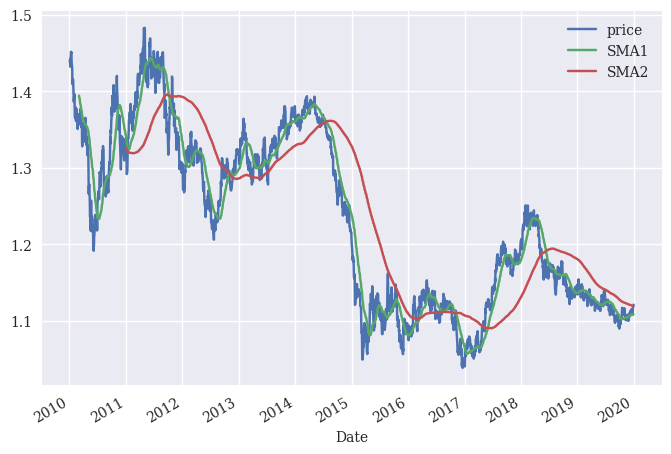

In [37]:
data.plot()

In [38]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.tail()

,price,SMA1,SMA2,position
Date,,,,
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1
2019-12-30,1.1197,1.108131,1.119333,-1
2019-12-31,1.1210,1.108279,1.119231,-1


In [39]:
data.dropna(inplace=True)

<Axes: xlabel='Date'>

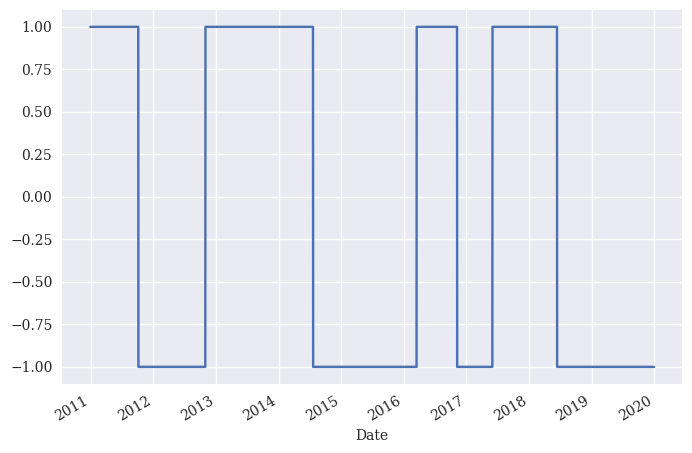

In [40]:
data['position'].plot(ylim=[-1.1, 1.1])

In [41]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<Axes: >

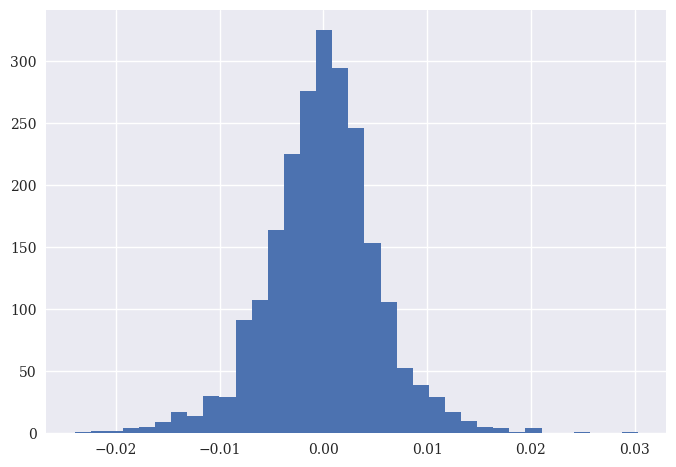

In [43]:
data['returns'].hist(bins=35)

In [44]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [49]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [51]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

<Axes: xlabel='Date'>

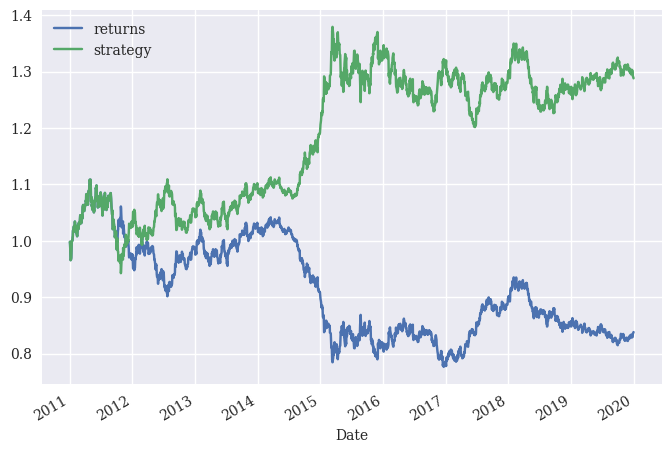

In [52]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot()

In [53]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [54]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

In [55]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [56]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64

In [57]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [58]:
data['cummax'] = data['cumret'].cummax()

<Axes: xlabel='Date'>

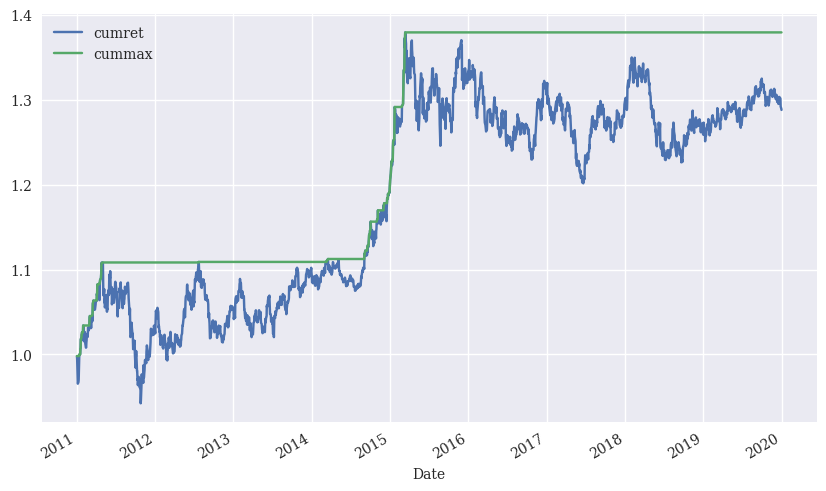

In [59]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6))

In [60]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

0.17779367070195895

In [61]:
temp = drawdown[drawdown == 0]
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [62]:
periods.max()

datetime.timedelta(days=596)

## Generalizing the Approach